In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
from scipy.optimize import minimize
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#10.3, 15.3, 7.7from the paper
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=230.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [3]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=1				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=1					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
##
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [4]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [5]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  230.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            1
  use Burton & Gordon 78?                 0
  use Clemens 85?                         0
  use Knapp+ 85?                          1
  use Luna+ 06?                           0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 0
 use cepheids?                          1
  use Pont+ 94?                           1
  use Pont+ 97?                     

In [6]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing CO terminal velocities...
 processing Knapp+ 85...
  selected  37  CO terminal velocities
processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing classical cepheids...
 processing Pont+ 94...
  selected  245  out of the total sample of  278  cepheids


In [7]:
vecRp    = np.array([row[0] for row in totallistvc])# galactocentric distance [kpc]
vecerrRp = np.array([row[1] for row in totallistvc])# error in galactocentric distance [kpc]
vecvRp   = np.array([row[2] for row in totallistvc])# rotation velocity [km/s]
vecerrvRp= np.array([row[3] for row in totallistvc])# error in rotation velocity [km/s]

In [8]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [9]:
R = np.linspace(0.1,15.,100)

In [10]:
def Vc2_b(R,rho_b,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Rx = R.reshape(-1, 1)
    yp = np.linspace(0.,1.,100).reshape(1,-1)#integration limits
    dx = yp[0,1] - yp[0,0]
    fun = I_b(yp,Rx)
    res_int = integrate.simps(fun,dx=dx)
    return 4.*np.pi*G*q_b*rho_b*res_int

In [11]:
 def Vc2_DM(R,a_h,rho_h,alpha_h,beta_h,q_h=q_h):
    def I_h(x,R):
        e = np.sqrt(1.- q_h**2.)
        n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
        d = np.sqrt(1-x**2.*e**2)
        t = R**2.*(R/a_h)**(-alpha_h)
        result = (t*n)/d
        return result
    Integral_DM = []
    for i in range (0,len(R)):
        result = integrate.quad(I_h,0,1,args=(R[i]))[0]
        Integral_DM.append(result)
    return 4.*np.pi*G*q_h*rho_h*np.array(Integral_DM)

In [12]:
def Vc2_SD_simps(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(zp,a,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD_sims = []
    a_lims = np.linspace(0.1, 15.0,len(R))
    zp_lims = np.linspace(-15.0,15.0,len(R))
    fun_zp = np.zeros(len(R))
    for k in range(0,len(R)):
        for i in range(0,len(R)):
            fun_zp[i] = integrate.simps(I_SD(zp_lims[i],a_lims,R[k]),a_lims)
        result = integrate.simps(fun_zp,zp_lims)
        Integral_SD_sims.append(result)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD_sims)/R_d

In [13]:
def Vc2_ISM(R,R_d,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)

In [14]:
ISM_M_I=Vc2_ISM(vecRp,R_d_I,Sigma_g_ISM_I)
ISM_M_II=Vc2_ISM(vecRp,R_d_II,Sigma_g_ISM_II)

In [15]:
SD_M_I=Vc2_SD_simps(vecRp,R_d_I,Sigma_d_SD_I)
SD_M_II=Vc2_SD_simps(vecRp,R_d_II,Sigma_d_SD_II)

KeyboardInterrupt: 

In [ ]:
plt.plot(vecRp,np.sqrt(SD_M_I),'.',label='Model I')
plt.plot(vecRp,np.sqrt(SD_M_II),'.',label='Model II')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='upper right', prop={'size':10})

# Model I

In [24]:
def Vc_tot_a_h_rho_h_rho_b_I(R,params,parameters):
    a_h,rho_h,rho_b = params
    alpha_h,beta_h= parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + SD_M_I + ISM_M_I
    return np.sqrt(suma)

In [25]:
par_wo_a_h_rho_h_rho_b_I = np.array([alpha_h_I,beta_h_I])
par_wo_a_h_rho_h_rho_b_II = np.array([alpha_h_II,beta_h_II])
par_wo_a_h_rho_h_rho_b_NFW = np.array([1.,3.])

In [29]:
def Xi2_a_rho_h_rho_b_I(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_tot_a_h_rho_h_rho_b_I(vecRp,par,par_wo_a_h_rho_h_rho_b_I)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [76]:
x0_a_rho_h_rho_b = np.array([0.01,np.log(1.0e8),np.log(1.0e8)])

In [77]:
LS_a_rho_h_rho_b_I = minimize(Xi2_a_rho_h_rho_b_I,x0_a_rho_h_rho_b,method='L-BFGS-B',bounds=((1.,9.),(np.log(0.1e8),np.log(20.0e8)),(np.log(1.0e8),np.log(30.0e8)),))

In [78]:
print LS_a_rho_h_rho_b_I

      fun: 2205.39387808218
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00000000e+00, 0.00000000e+00, 9.09494702e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 144
      nit: 27
   status: 0
  success: True
        x: array([ 2.62194928, 20.94276376, 20.71227159])


In [79]:
pars_a_rho_h_rho_b_min_I = np.array([LS_a_rho_h_rho_b_I.x[0],np.exp(LS_a_rho_h_rho_b_I.x[1]),np.exp(LS_a_rho_h_rho_b_I.x[2])])
print pars_a_rho_h_rho_b_min_I

[2.62194928e+00 1.24545126e+09 9.89065968e+08]


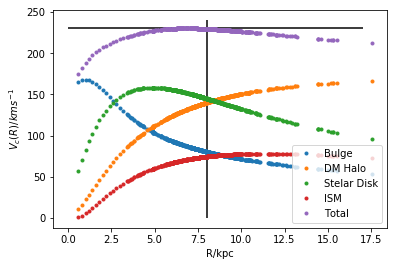

In [80]:
plt.plot(vecRp,np.sqrt(Vc2_b(vecRp,np.asscalar(np.exp(LS_a_rho_h_rho_b_I.x[2])))),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_DM(vecRp,np.asscalar(LS_a_rho_h_rho_b_I.x[0]),np.asscalar(np.exp(LS_a_rho_h_rho_b_I.x[1])),alpha_h_I,beta_h_I)),'.',label='DM Halo')
plt.plot(vecRp,np.sqrt(SD_M_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(ISM_M_I),'.',label='ISM')
plt.plot(vecRp,Vc_tot_a_h_rho_h_rho_b_I(vecRp,pars_a_rho_h_rho_b_min_I,par_wo_a_h_rho_h_rho_b_I),'.',label='Total')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_rho_b_rho_h_a_h_I.pdf')

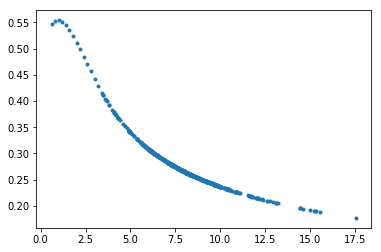

In [36]:
plt.plot(vecRp,np.sqrt(Vc2_b(vecRp,np.asscalar(np.exp(LS_a_rho_h_rho_b_I.x[2])))),'.',label='Bulge')

# Model II

In [39]:
def Vc_tot_a_h_rho_h_rho_b_II(R,params,parameters):
    a_h,rho_h,rho_b = params
    alpha_h,beta_h= parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + SD_M_II + ISM_M_II
    return np.sqrt(suma)

In [40]:
def Xi2_a_rho_h_rho_b_II(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_tot_a_h_rho_h_rho_b_II(vecRp,par,par_wo_a_h_rho_h_rho_b_II)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [70]:
x0_a_rho_h_rho_b_II = np.array([0.01,np.log(1.0e8),np.log(1.0e8)])

In [71]:
LS_a_rho_h_rho_b_II = minimize(Xi2_a_rho_h_rho_b_II,x0_a_rho_h_rho_b_II,method='L-BFGS-B',bounds=((1.,9.),(np.log(0.1e8),np.log(20.0e8)),(np.log(1.0e8),np.log(30.0e8)),))

In [72]:
print LS_a_rho_h_rho_b_II

      fun: 2247.0695434896716
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([33.97508408, -0.99953468, -4.12405825])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 292
      nit: 52
   status: 0
  success: True
        x: array([ 1.00144961, 20.90071771, 18.47492551])


In [73]:
pars_a_rho_h_rho_b_min_II = np.array([LS_a_rho_h_rho_b_II.x[0],np.exp(LS_a_rho_h_rho_b_II.x[1]),np.exp(LS_a_rho_h_rho_b_II.x[2])])
print pars_a_rho_h_rho_b_min_II

[1.00144961e+00 1.19417058e+09 1.05574298e+08]


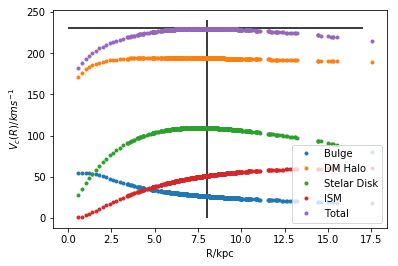

In [75]:
plt.plot(vecRp,np.sqrt(Vc2_b(vecRp,np.asscalar(np.exp(LS_a_rho_h_rho_b_II.x[2])))),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_DM(vecRp,np.asscalar(LS_a_rho_h_rho_b_II.x[0]),np.asscalar(np.exp(LS_a_rho_h_rho_b_II.x[1])),alpha_h_II,beta_h_II)),'.',label='DM Halo')
plt.plot(vecRp,np.sqrt(SD_M_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(ISM_M_II),'.',label='ISM')
plt.plot(vecRp,Vc_tot_a_h_rho_h_rho_b_II(vecRp,pars_a_rho_h_rho_b_min_II,par_wo_a_h_rho_h_rho_b_II),'.',label='Total')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_rho_b_rho_h_a_h_II.pdf')

# NFW I

In [48]:
def Vc_tot_a_h_rho_h_rho_b_NFWI(R,params,parameters):
    a_h,rho_h,rho_b = params
    alpha_h,beta_h= parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + SD_M_I + ISM_M_I
    return np.sqrt(suma)

In [49]:
def Xi2_a_rho_h_rho_b_NFWI(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_tot_a_h_rho_h_rho_b_NFWI(vecRp,par,par_wo_a_h_rho_h_rho_b_NFW)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [112]:
x0_a_rho_h_rho_b_NFWI = np.array([1.,np.log(0.1e8),np.log(0.0001e8)])

In [113]:
LS_a_rho_h_rho_b_NFWI = minimize(Xi2_a_rho_h_rho_b_NFWI,x0_a_rho_h_rho_b_NFWI,method='L-BFGS-B',bounds=((1.,9.),(np.log(0.1e8),np.log(20.0e8)),(np.log(0.0001e8),np.log(30.0e8)),))

In [114]:
print LS_a_rho_h_rho_b_NFWI

      fun: 2684.5516814594175
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.0165528 ,  0.02387424, -0.00877662])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 148
      nit: 24
   status: 0
  success: True
        x: array([ 3.05318493, 19.43325486,  9.45009181])


In [115]:
pars_a_rho_h_rho_b_min_NFWI = np.array([LS_a_rho_h_rho_b_NFWI.x[0],np.exp(LS_a_rho_h_rho_b_NFWI.x[1]),np.exp(LS_a_rho_h_rho_b_NFWI.x[2])])
print pars_a_rho_h_rho_b_min_NFWI

[3.05318493e+00 2.75267761e+08 1.27093320e+04]


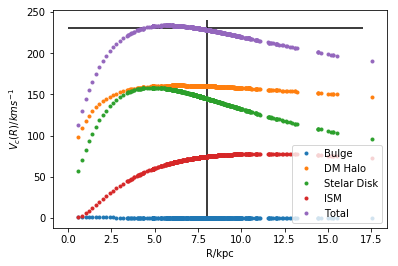

In [116]:
plt.plot(vecRp,np.sqrt(Vc2_b(vecRp,np.asscalar(np.exp(LS_a_rho_h_rho_b_NFWI.x[2])))),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_DM(vecRp,np.asscalar(LS_a_rho_h_rho_b_NFWI.x[0]),np.asscalar(np.exp(LS_a_rho_h_rho_b_NFWI.x[1])),1.,3.)),'.',label='DM Halo')
plt.plot(vecRp,np.sqrt(SD_M_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(ISM_M_I),'.',label='ISM')
plt.plot(vecRp,Vc_tot_a_h_rho_h_rho_b_NFWI(vecRp,pars_a_rho_h_rho_b_min_NFWI,par_wo_a_h_rho_h_rho_b_NFW),'.',label='Total')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_rho_b_rho_h_a_h_NFWI.pdf')

# NFW II

In [63]:
def Vc_tot_a_h_rho_h_rho_b_NFWII(R,params,parameters):
    a_h,rho_h,rho_b = params
    alpha_h,beta_h= parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + SD_M_II + ISM_M_II
    return np.sqrt(suma)

In [64]:
def Xi2_a_rho_h_rho_b_NFWII(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_tot_a_h_rho_h_rho_b_NFWII(vecRp,par,par_wo_a_h_rho_h_rho_b_NFW)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [65]:
x0_a_rho_h_rho_b_NFWII = np.array([0.01,np.log(1.0e8),np.log(1.0e8)])

In [66]:
LS_a_rho_h_rho_b_NFWII = minimize(Xi2_a_rho_h_rho_b_NFWII,x0_a_rho_h_rho_b_NFWII,method='L-BFGS-B',bounds=((1.,15.),(np.log(0.1e8),np.log(20.0e8)),(np.log(1.0e8),np.log(30.0e8)),))

In [67]:
print LS_a_rho_h_rho_b_NFWII

      fun: 2268.446255634816
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.01264198, 0.03101377, 0.01123226])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 216
      nit: 42
   status: 0
  success: True
        x: array([ 4.48866644, 18.92340541, 20.41993921])


In [68]:
pars_a_rho_h_rho_b_min_NFWII = np.array([LS_a_rho_h_rho_b_NFWII.x[0],np.exp(LS_a_rho_h_rho_b_NFWII.x[1]),np.exp(LS_a_rho_h_rho_b_NFWII.x[2])])
print pars_a_rho_h_rho_b_min_NFWII

[4.48866644e+00 1.65321961e+08 7.38357888e+08]


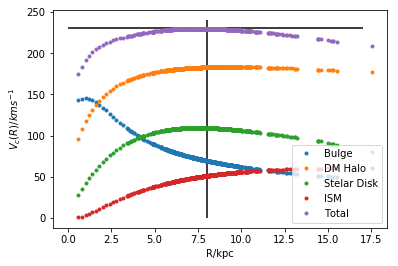

In [69]:
plt.plot(vecRp,np.sqrt(Vc2_b(vecRp,np.asscalar(np.exp(LS_a_rho_h_rho_b_NFWII.x[2])))),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_DM(vecRp,np.asscalar(LS_a_rho_h_rho_b_NFWII.x[0]),np.asscalar(np.exp(LS_a_rho_h_rho_b_NFWII.x[1])),1.,3.)),'.',label='DM Halo')
plt.plot(vecRp,np.sqrt(SD_M_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(ISM_M_II),'.',label='ISM')
plt.plot(vecRp,Vc_tot_a_h_rho_h_rho_b_NFWII(vecRp,pars_a_rho_h_rho_b_min_NFWII,par_wo_a_h_rho_h_rho_b_NFW),'.',label='Total')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_rho_b_rho_h_a_h_NFWII.pdf')

# NOTA: tiene un mínimo local, donde la densidad del bulbo queda del orden x10^4